## TP no 2 : k-plus proches voisins, analyse discriminante linéaire et régression logistique

In [1]:
from tp_knn_source import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors, model_selection
import seaborn as sns
from matplotlib.colors import ListedColormap
import random as rd
import math as m
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

### Génération artificielle de données

#### Question 1

La fonction rand_bi_gauss renvoie un jeu de p=2 features de distribution gaussienne. Ces features contiennent $n_1 + n_2$ données respectivement centrée en $\mu_1$ et $\mu_2$, d'écart type $\sigma_1$ et $\sigma_2$ et de label $Y = 1$ et $Y = -1$. 

La fonction rand_tri_gauss renvoie un jeu de p=2 features de distribution gaussienne. Ces features contiennent $n_1 + n_2$ données respectivement centrée en $\mu_1$, $\mu_2$ et $\mu_3$, d'écart type $\sigma_1$, $\sigma_2$ et $\sigma_3$ et de label $Y = 1$, $Y = 2$ et  $Y = 3$.

La fonction rand_clown renvoie un jeu de p=2 features. Parmie ces données, n1 ont ces caractéristiques : $[p_1, x_0^2 + \sigma_1 * p_2$  avec $p_1$ et $p_2$ générés par la loi normale. Les $n_2$ autres données ont ces caractéristiques : $[\sigma_2 p_1, \sigma_2 p_2 + 2]$ et de label $Y = -1$ et $Y = 1$. 

Les quatres fonctions renvoient un ensemble de feature X associé à leur label Y.

In [56]:
X1, Y1 = rand_bi_gauss(20, 20, [1, 1], [-1, -1], [0.9, 0.9], [0.9, 0.9])

X2, Y2 = rand_tri_gauss(50, 50, 50, [1, 1], [-1, -1], [1, -1], [0.9, 0.9], [0.9, 0.9], [0.9, 0.9])

X3, Y3 = rand_clown(50, 50, 1, 5)

X4, Y4 = rand_checkers(150, 150)

#### Question 2

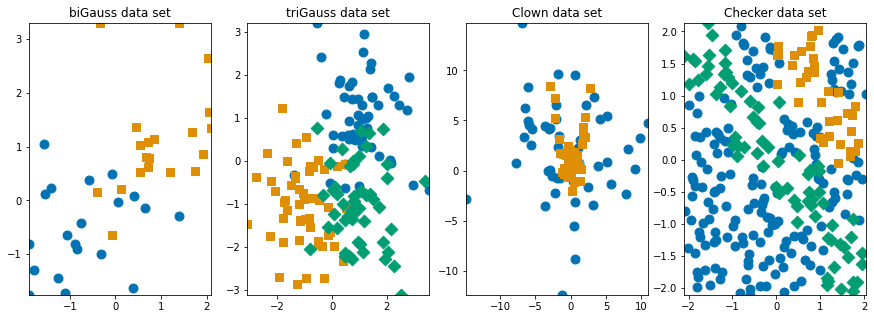

In [57]:
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('biGauss data set')
plot_2d(X1, Y1)
plt.subplot(142)
plt.title('triGauss data set')
plot_2d(X2, Y2)
plt.subplot(143)
plt.title('Clown data set')
plot_2d(X3, Y3)
plt.subplot(144)
plt.title('Checker data set')
plot_2d(X4, Y4)
plt.show()

### La méthode des k-plus proches voisins

### Approche intuitive

#### Question 3

Pour chaque nouveau point $x$ on commence par déterminer l’ensemble de ses k-plus proches voisins parmi les points d’apprentissage que l’on note $V_k(x)$ (avec $1 ≤ k ≤ n$ pour que cela ait un sens). La valeur que l’on affecte au nouveau
point $x$ est alors la moyenne des valeurs de l’ensemble $V_k(x)$. 

### Approche formelle

#### Question 4

In [58]:
class KNNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_neighbors=1):
        self.k = n_neighbors
        BaseEstimator.__init__(self)
        ClassifierMixin.__init__(self)
    
    def score(self, Xtest, Ytest):
        score = ClassifierMixin.score(self, X = Xtest, y = Ytest)
        return score     
        
    def fit(self, Xtrain, Ytrain):
        self.Xtrain = Xtrain
        self.Ytrain = Ytrain
        self.classes = []
        for y in Ytrain :
            if y not in self.classes:
                self.classes.append(y)
        return self
    
    def predict(self, X_to_classify):
        Ypredict = []
        for x_to_classify in X_to_classify:
            distance = {}
            k=0
            for x_fit in self.Xtrain:
                distance[k] = self.euclidean_distance(x_fit, x_to_classify)
                k+=1
            distance = sorted(distance.items(), key=lambda t: t[1])
            prev = -1000000
            index = []
            k=0
            for cle, valeur in distance :
                if valeur == prev :
                    rand = rd.random()
                    if rand <0.5:
                        index.insert(k-1, cle)
                else :
                    index.append(cle)
                prev = valeur
            index = index[:self.k]
            class_label = {}
            for c in self.classes :
                class_label[c] = 0
            for i in index :
                class_label[self.Ytrain[i]] +=1
            knn = 0
            class_maj = 0
            for cle, valeur in class_label.items() :
                if valeur > knn :
                    knn = valeur
                    class_maj = cle
            Ypredict.append(class_maj)
        return Ypredict
    
    def euclidean_distance(self, x_fit, x_to_classify):
        distance = 0
        for k in range(len(x_fit)):
            distance = distance + (x_fit[k] - x_to_classify[k])**2
        distance = distance**(1/2)
        return distance

In [59]:
X2train = []
X2test = []
k=0
for x in X2:
    if k%2 == 0:
        X2train.append(x)
    else :
        X2test.append(x)
    k+=1

Y2train = []
Y2test = []
k=0
for y in Y2:
    if k%2 == 0:
        Y2train.append(y)
    else :
        Y2test.append(y)
    k+=1

model_own_knn = KNNClassifier(n_neighbors=5).fit(X2train, Y2train)
result_own_knn = model_own_knn.predict(X2test)
print("Sur le jeu de données 2 (rand_tri_gauus), on obtient les prédictions suivantes à l'aide notre classe KNN:",
      result_own_knn)

Sur le jeu de données 2 (rand_tri_gauus), on obtient les prédictions suivantes à l'aide notre classe KNN: [2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 2.0]


Afin de comparer la méthode "homemade" et celle de scikit learn, je vais comparer les prédictions de mon algorithme à celles du modèle de scikit learn. Dans un second temps je comparerai les scores de chacune des solutions.

In [60]:
model_sklearn = KNeighborsClassifier(n_neighbors=5).fit(X2train, Y2train)
result_sklearn = model_sklearn.predict(X2test)
print("Sur le jeu de données 2 (rand_tri_gauus), on obtient les prédictions suivantes à l'aide la classe KNN de scikit learn:"
      , result_sklearn)

Sur le jeu de données 2 (rand_tri_gauus), on obtient les prédictions suivantes à l'aide la classe KNN de scikit learn: [2. 1. 2. 3. 2. 1. 2. 1. 1. 3. 2. 2. 2. 1. 3. 2. 3. 2. 1. 3. 3. 2. 3. 1.
 1. 2. 1. 3. 3. 2. 3. 1. 3. 2. 3. 1. 1. 1. 3. 3. 2. 3. 3. 1. 1. 3. 1. 3.
 2. 1. 3. 2. 2. 2. 2. 2. 1. 3. 1. 3. 1. 2. 3. 2. 3. 2. 3. 1. 1. 2. 3. 3.
 1. 3. 2.]


In [61]:
print("comparaison entre les prédictions du KNN homemade et celui de scikit learn : \n", result_sklearn == result_own_knn)

comparaison entre les prédictions du KNN homemade et celui de scikit learn : 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [62]:
score_own_knn = model_own_knn.score(X2test, Y2test)
print("Le score de prédiction du KNN homemade :" , score_own_knn)

Le score de prédiction du KNN homemade : 0.7333333333333333


In [63]:
score_sklearn = model_sklearn.score(X2test, Y2test)
print("Le score de prédiction du KNN scikit learn :" , score_sklearn)

Le score de prédiction du KNN scikit learn : 0.7333333333333333


#### Question 5

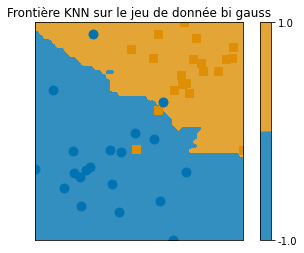

In [10]:
def reshape_for_frontierNew(xx):
    return model1.predict(xx.reshape(1, -1))

model1 = KNeighborsClassifier(n_neighbors = 5, p = 2).fit(X1, Y1)

frontiere_new(reshape_for_frontierNew, X1, Y1)
plt.title('Frontière KNN sur le jeu de donnée bi gauss')
plt.show()

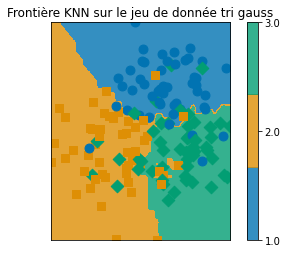

In [11]:
def reshape_for_frontierNew(xx):
    return model2.predict(xx.reshape(1, -1))

model2 = KNeighborsClassifier(n_neighbors = 5, p = 2).fit(X2, Y2)

frontiere_new(reshape_for_frontierNew, X2, Y2)
plt.title('Frontière KNN sur le jeu de donnée tri gauss')
plt.show()

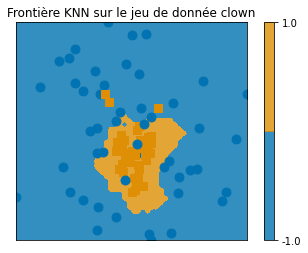

In [12]:
def reshape_for_frontierNew(xx):
    return model3.predict(xx.reshape(1, -1))

model3 = KNeighborsClassifier(n_neighbors = 5, p = 2).fit(X3, Y3)

frontiere_new(reshape_for_frontierNew, X3, Y3)
plt.title('Frontière KNN sur le jeu de donnée clown')
plt.show()

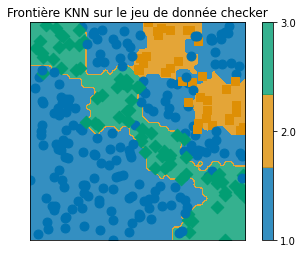

In [13]:
def reshape_for_frontierNew(xx):
    return model4.predict(xx.reshape(1, -1))

model4 = KNeighborsClassifier(n_neighbors = 5, p = 2).fit(X4, Y4)

frontiere_new(reshape_for_frontierNew, X4, Y4)
plt.title('Frontière KNN sur le jeu de donnée checker')
plt.show()

#### Question 6

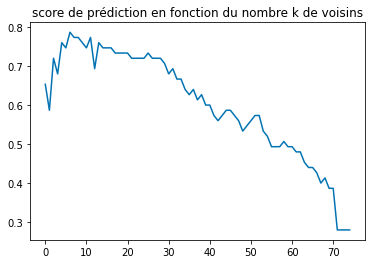

In [14]:
X2train = []
X2test = []
k=0
for x in X2:
    if k%2 == 0:
        X2train.append(x.tolist())
    else :
        X2test.append(x.tolist())
    k+=1
X2train = np.array(X2train)
X2test = np.array(X2test)

Y2train = []
Y2test = []
k=0
for y in Y2:
    if k%2 == 0:
        Y2train.append(y.tolist())
    else :
        Y2test.append(y.tolist())
    k+=1
Y2train = np.array(Y2train)
Y2test = np.array(Y2test)

score = []
for k in range(len(X2train)):
    model2 = KNeighborsClassifier(n_neighbors = k+1, p = 2).fit(X2train, Y2train)
    score.append(model2.score(X2test, Y2test))

plt.plot(score)
plt.title('score de prédiction en fonction du nombre k de voisins')
plt.show()

Dans le cas où k = 1, on prend uniquement le point le plus proche. On risque alors le suraprentissage. En effet, si un outlier se trouve dans la zone d'un autre label, il y aura une zone de longueur $d$ autour de ce point où les prédictions prendront la valeur de l'outlier.

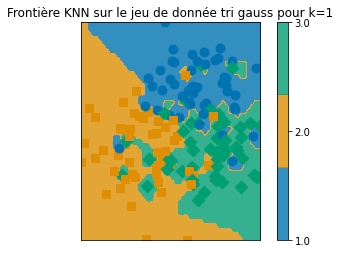

In [15]:
def reshape_for_frontierNew(xx):
    return model2.predict(xx.reshape(1, -1))

model2 = KNeighborsClassifier(n_neighbors = 1, p = 2).fit(X2, Y2)

frontiere_new(reshape_for_frontierNew, X2, Y2)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=1')
plt.show()

Plus le $k$ pris sera grand, plus on empêche les "troues" dans le graph, mais plus on est soumis aux label présent dans le training set.

Dans le cas extême où $k = n$, le seul label de prédit par le modèle sera le label majoritaire.

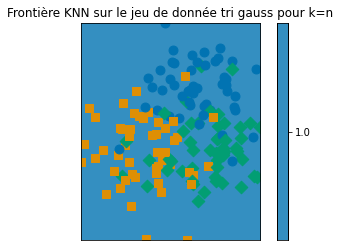

In [16]:
def reshape_for_frontierNew(xx):
    return model2.predict(xx.reshape(1, -1))

model2 = KNeighborsClassifier(n_neighbors = len(X2), p = 2).fit(X2, Y2)

frontiere_new(reshape_for_frontierNew, X2, Y2)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=n')
plt.show()

Donc plus k est petit, plus la frontière est complexe et plus k est grand plus la frontière est simple.

#### Question 7

Score de prédiction pour j=-2 : 0.6533333333333333


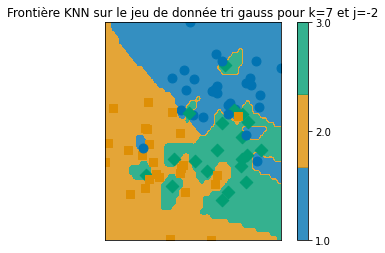

In [17]:
def exp_ponderation(distance):
    c = 0.01
    weights = []
    for d in distance[0] :
        weights.append(m.exp(-d**2/c))
    return weights

def reshape_for_frontierNew(xx):
    return model_exp_pond.predict(xx.reshape(1, -1))

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2train, Y2train)
print("Score de prédiction pour j=-2 :", model_exp_pond.score(X2test, Y2test))

frontiere_new(reshape_for_frontierNew, X2train, Y2train)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=7 et j=-2')
plt.show()

Score de prédiction pour j=-1 : 0.7066666666666667


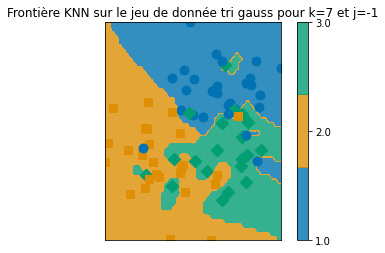

In [18]:
def exp_ponderation(distance):
    c = 0.1
    weights = []
    for d in distance[0] :
        weights.append(m.exp(-d**2/c))
    return weights

def reshape_for_frontierNew(xx):
    return model_exp_pond.predict(xx.reshape(1, -1))

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2train, Y2train)
print("Score de prédiction pour j=-1 :",model_exp_pond.score(X2test, Y2test))

frontiere_new(reshape_for_frontierNew, X2train, Y2train)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=7 et j=-1')
plt.show()

Score de prédiction pour j=0 : 0.7866666666666666


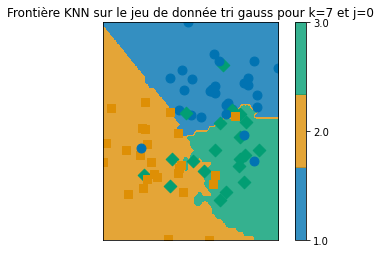

In [19]:
def exp_ponderation(distance):
    c = 1
    weights = []
    for d in distance[0] :
        weights.append(m.exp(-d**2/c))
    return weights

def reshape_for_frontierNew(xx):
    return model_exp_pond.predict(xx.reshape(1, -1))

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2train, Y2train)
print("Score de prédiction pour j=0 :",model_exp_pond.score(X2test, Y2test))

frontiere_new(reshape_for_frontierNew, X2train, Y2train)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=7 et j=0')
plt.show()

Score de prédiction pour j=1 : 0.8


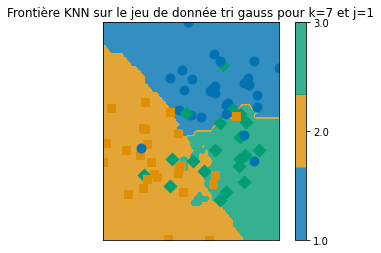

In [20]:
def exp_ponderation(distance):
    c = 10
    weights = []
    for d in distance[0] :
        weights.append(m.exp(-d**2/c))
    return weights

def reshape_for_frontierNew(xx):
    return model_exp_pond.predict(xx.reshape(1, -1))

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2train, Y2train)
print("Score de prédiction pour j=1 :",model_exp_pond.score(X2test, Y2test))

frontiere_new(reshape_for_frontierNew, X2train, Y2train)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=7 et j=1')
plt.show()

Score de prédiction pour j=2 : 0.8


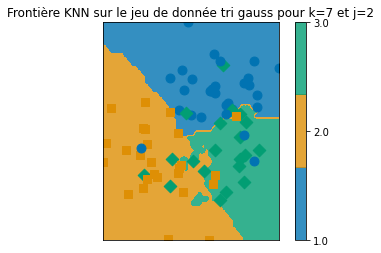

In [21]:
def exp_ponderation(distance):
    c = 100
    weights = []
    for d in distance[0] :
        weights.append(m.exp(-d**2/c))
    return weights

def reshape_for_frontierNew(xx):
    return model_exp_pond.predict(xx.reshape(1, -1))

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2train, Y2train)
print("Score de prédiction pour j=2 :",model_exp_pond.score(X2test, Y2test))

frontiere_new(reshape_for_frontierNew, X2train, Y2train)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=7 et j=2')
plt.show()

Afin de comparer, j'ai plot la frontière de décision pour le cas où les poids sont uniformes.

Score de prédiction pour KNN avec poid uniforme : 0.7866666666666666


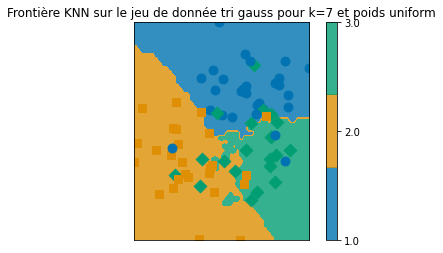

In [22]:
model_uniform = KNeighborsClassifier(n_neighbors = 7, p = 2).fit(X2train, Y2train)
def reshape_for_frontierNew(xx):
    return model_uniform.predict(xx.reshape(1, -1))

print("Score de prédiction pour KNN avec poid uniforme :",model_uniform.score(X2test, Y2test))
frontiere_new(reshape_for_frontierNew, X2train, Y2train)
plt.title('Frontière KNN sur le jeu de donnée tri gauss pour k=7 et poids uniform')
plt.show()

Lorsque $j<0$ on accorde beaucoup plus d'importance aux points à une distance plus faible. On peut d'ailleurs le voir sur les plot : lorsque $j = -2$, il y a, comme pour un k faible, des "troues" dans les frontières qui devraient pourtant être bien séparé.

Il faut donc plûtot choisir un $j$ élevé (à partir de $j = 0$, le score est constant mais est tout de même meilleur que sans affecter de poids).

#### Question 8 :

In [23]:
def exp_ponderation(distance):
    c = 10
    weights = []
    for d in distance[0] :
        weights.append(m.exp(-d**2/c))
    return weights

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2train, Y2train)
print("Score lorsque k = 1 pour les données paires :", model_exp_pond.score(X2train, Y2train))

model_exp_pond = KNeighborsClassifier(n_neighbors = 7, p = 2, weights=exp_ponderation).fit(X2test, Y2test)
print("Score lorsque k = 1 pour les données impaires :",model_exp_pond.score(X2test, Y2test))

Score lorsque k = 1 pour les données paires : 0.7733333333333333
Score lorsque k = 1 pour les données impaires : 0.84


#### Question 9 :

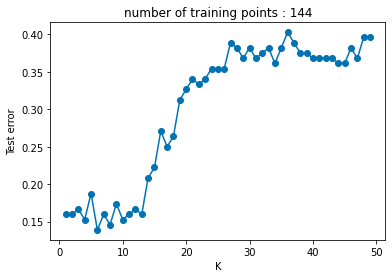

In [24]:
X4train = []
X4test = []
k=0
for x in X4:
    if k%2 == 0:
        X4train.append(x.tolist())
    else :
        X4test.append(x.tolist())
    k+=1
X4train = np.array(X4train)
X4test = np.array(X4test)

Y4train = []
Y4test = []
k=0
for y in Y4:
    if k%2 == 0:
        Y4train.append(y.tolist())
    else :
        Y4test.append(y.tolist())
    k+=1
Y4train = np.array(Y4train)
Y4test = np.array(Y4test)

curve = ErrorCurve(k_range = list(range(1, 50)))
curve.fit_curve(X4train, Y4train, X4test, Y4test)
curve.plot()

#### Question 10 :

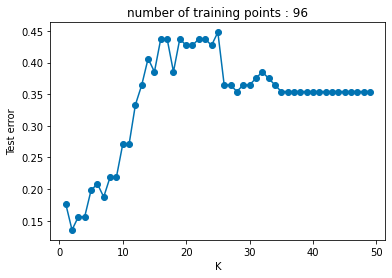

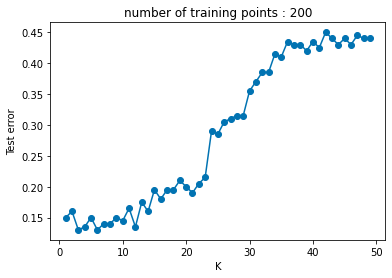

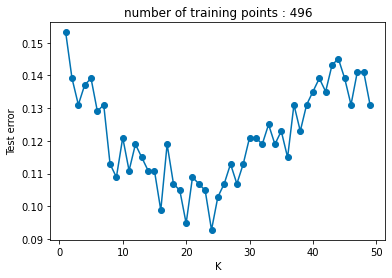

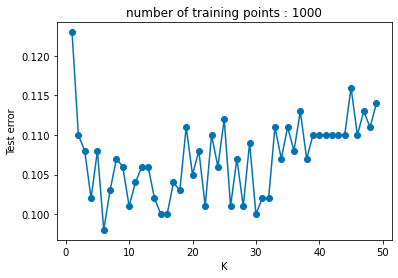

In [25]:
for n in [100, 200, 500, 1000]:
    X4_n, Y4_n = rand_checkers(n, n)

    X4train_n = []
    X4test_n = []
    k=0
    for x in X4_n:
        if k%2 == 0:
            X4train_n.append(x.tolist())
        else :
            X4test_n.append(x.tolist())
        k+=1
    X4train_n = np.array(X4train_n)
    X4test_n = np.array(X4test_n)

    Y4train_n = []
    Y4test_n = []
    k=0
    for y in Y4_n:
        if k%2 == 0:
            Y4train_n.append(y.tolist())
        else :
            Y4test_n.append(y.tolist())
        k+=1
    Y4train_n = np.array(Y4train_n)
    Y4test_n = np.array(Y4test_n)

    curve = ErrorCurve(k_range = list(range(1, 50)))
    curve.fit_curve(X4train_n, Y4train_n, X4test_n, Y4test_n)
    curve.plot()
    plt.show()

La valeur de $k$ optimal différe selon les dataset. En effet, pour les dataset avec peu de données ($n = 100$ et $n = 200$), la précision décroit selon $k$. 

Pour les dataset avec plus de données ($n = 500$ et $n = 1000$), une valeur de $k$ comprise entre 10 et 15 semble donnée une erreur plus faible.

Pour plot la frontière de décision dans le cas où $n = 1000$ j'ai pris $k=12$.

Score lorsque k = 12 et n = 1000 : 0.894


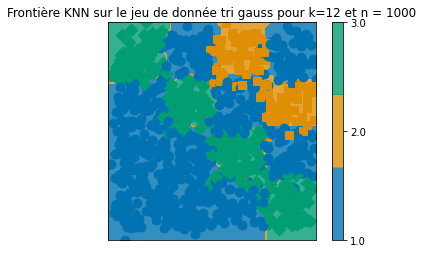

In [26]:
model_1000 = KNeighborsClassifier(n_neighbors = 12, p = 2).fit(X4train_n, Y4train_n)
def reshape_for_frontierNew(xx):
    return model_1000.predict(xx.reshape(1, -1))

print("Score lorsque k = 12 et n = 1000 :",model_1000.score(X4test_n, Y4test_n))
frontiere_new(reshape_for_frontierNew, X4train_n, Y4train_n)
plt.title("Frontière KNN sur le jeu de donnée tri gauss pour k=12 et n = 1000")
plt.show()

#### Question 11

La méthode des knn semble présenté plusieurs avantages. Le premier avantage c'est que l'on a pas d'hypothèses à faire sur les données. De plus, elle est simple à mettre en oeuvre et simple à interprêté. En effet, on part du postulat que deux individus ayant des caractéristiques proches (features) auront les même propriétés (label).

Cependant, le temps de calcul augmente avec le nombre données (de l'ordre de $O(n)$ tant que $k$ est petit devant $n$. Le passage à l'échelle semble donc difficile. De plus, le choix de la métrique et du nombre de voisins $k$ à considérer peuvent être difficile et varier en fonction du dataset.

#### Question 12

In [27]:
digits = datasets.load_digits()

In [28]:
digits['data'].shape

(1797, 64)

La base de données digits, sous forme de dictionnaire, contient la clé data pointant sur l'ensemble des images (il y a 1797 exemples d'images). Chaques images contient 8x8 = 64 pixels noir ou blanc. 

In [29]:
digits['target'].shape

(1797,)

La clé 'target' pointe sur les labels associé aux features. Cette base de données contient 1797 images et chacune de ces images est labelisé donc 'target' contient 1797 labels.

In [30]:
digits['target_names'].shape

(10,)

La clé 'target_names' liste l'ensemble des valeurs que peuvent prendre les labels. Il y a en l'occurence 10 valeurs car on cherche à reconnaitre les chiffres de 0 à 9.

In [31]:
digits['images'].shape

(1797, 8, 8)

La clé 'images' a les même données que celles de 'dat'. Cependant, sa dimension n'est pas la même (1797x8x8 contre 1797x64 pour 'data'). En effet, pour chacune des images, chaque ligne contient les bits contenues dans une ligne de l'image.

Text(0.5, 1.0, 'Training: 0')

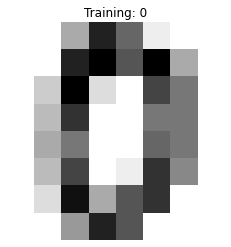

In [32]:
_, axes = plt.subplots(1, 1)
image, label = digits.images[0], digits.target[0]

axes.set_axis_off()
axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
axes.set_title('Training: %i' % label)

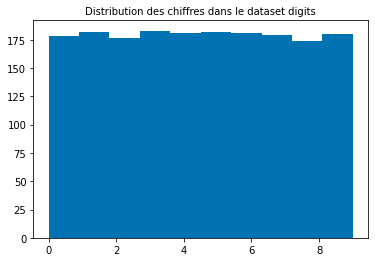

In [33]:
hist = plt.hist(digits['target'])
plt.title('Distribution des chiffres dans le dataset digits', fontsize=10)
plt.show()

La distribution est à peu de choses prêt uniforme.

In [34]:
Xtrain_digits, Xtest_digits, Ytrain_digits, Ytest_digits = train_test_split(digits['data'],
                                                                            digits['target'], test_size=0.5, shuffle=True)

In [35]:
model_digits = KNeighborsClassifier(n_neighbors = 30, p = 2).fit(Xtrain_digits, Ytrain_digits)
print("Score lorsque k = 30 sur la base de données digits :", model_digits.score(Xtest_digits, Ytest_digits))

Score lorsque k = 30 sur la base de données digits : 0.9543937708565072


#### Question 13

J'ai une erreur quand j'essaye de charger la fonction plot_confusion_matrix. J'utiliserai donc la méthode confusion_matrix.

In [36]:
Y_pred = model_digits.predict(Xtest_digits)
confusion_matrix(Ytest_digits, Y_pred, labels=digits['target_names'])

array([[ 84,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  90,   0,   0,   0,   0,   0,   0,   0,   5],
       [  1,   1,  91,   1,   0,   0,   0,   1,   4,   0],
       [  0,   0,   0,  87,   0,   1,   0,   1,   1,   0],
       [  0,   1,   0,   0,  89,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1,  91,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 101,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  91,   0,   0],
       [  0,   6,   0,   1,   0,   2,   0,   0,  68,   2],
       [  0,   0,   0,   0,   1,   2,   0,   5,   1,  66]], dtype=int64)

Il semble que le 9 et le 8 sont souvent confondu avec d'autres chiffres. Pour le 9, il est souvent confondu avec le 7. Le 8 est lui majoritairement confondu avec le 1.

#### Question 14 :

Afin de trouver le $k$ optimal, on va afficher l'erreur de prédiction en fonction de $k$. On conservera alors le $k$ donnant l'erreur la plus basse.

L'enoncé nous invite à utiliser la fonction LOOCurve qui permet de faire une cross validation qui a la spécificité de mettre dans le fold $n-1$ valeurs puis de faire la validation sur une seule valeur.

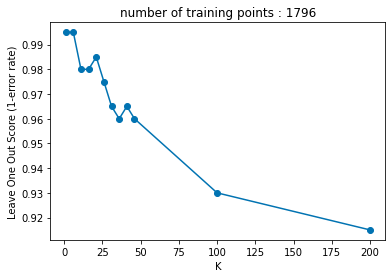

In [37]:
k = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200]
X_digits = digits['data']
Y_digits = digits['target']

curve_cv = LOOCurve(k_range = k)
curve_cv.fit_curve(X = X_digits, y = Y_digits)
curve_cv.plot()

Le choix de $k = 1$ ou $k = 6$ semble être le plus judicieux. En effet, la précision du modèle décroit avec $k$.

#### Question 15 :

On a :

$ P(X = x | Y = +1) = f_+ $

$ P(X = x | Y = -1) = f_-$ 

$ π_+ = P(Y = +1) $ 

$ π_- = P(Y = -1) $

$ π_+ + π_- = 1 $

On cherche à exmprimer $P(Y = +1 | X = x)$ en fonction de $π_+ , f_+ $ et $f_-$. 

D'après la formule de Bayes, on peut écrire :

$P(Y = +1 | X = x) = \cfrac{P(Y = +1) P(X = x | Y = +1)}{P(Y = -1) P(X = x | Y = -1) + P(Y = +1) P(X = x | Y = +1)} $

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= \cfrac{π_+ f_+}{(1 - π_+) f_- + π_+ f_+ } $

On peut exprimer de la même manière :

$P(Y = -1 | X = x) = \cfrac{(1 - π_+) f_-}{(1 - π_+) f_- + π_+ f_+ } $



#### Question 16 :

On cherche à exprimer $log \Bigg( \cfrac{ P(Y = +1 | X = x) }{P(Y = −1 | X = x )} \Bigg)$ en fonction de $π_+, µ_+, µ_−$ et $Σ$

$log \Bigg( \cfrac{ P(Y = +1 | X = x) }{P(Y = −1 | X = x )} \Bigg) = log \Bigg( \cfrac{π_+ f_+}{(1 - π_+) f_- + π_+ f_+ } \cfrac{(1 - π_+) f_- + π_+ f_+}{ (1 - π_+) f_- } \Bigg) $

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= log \Bigg(\cfrac{π_+ f_+}{(1 - π_+) f_-}\Bigg) $

Remplaçons $f_+$ et $f_-$ par leur expression :

$log \Bigg( \cfrac{ P(Y = +1 | X = x) }{P(Y = −1 | X = x )} \Bigg) = log \Bigg( \cfrac{π_+}{1 - π_+}~~e^{ \cfrac{-1}{2} (x - µ_+)^T Σ^{-1} (x - µ_+) + \cfrac{1}{2} (x - µ_-)^T Σ^{-1} (x - µ_-) }\Bigg) $

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~= log \Bigg( \cfrac{π_+}{1 - π_+} \Bigg) +  \cfrac{1}{2}\Bigg( (x - µ_-)^T Σ^{-1} (x - µ_-) - (x - µ_+)^T Σ^{-1} (x - µ_+) \Bigg)$

#### Question 17 :

Si la classe Y = +1 est majoritaire pour la feature x, on a l'inégalité suivante :

$log \Bigg( \cfrac{ P(Y = +1 | X = x) }{P(Y = −1 | X = x )} \Bigg) > 0 $

On remplace alors le log par la valeur calculé à la question précédente : 

$log \Bigg( \cfrac{π_+}{1 - π_+} \Bigg) +  \cfrac{1}{2}\Bigg( (x - µ_-)^T Σ^{-1} (x - µ_-) - (x - µ_+)^T Σ^{-1} (x - µ_+) \Bigg) > 0$

On remplace $π_+$ par $\cfrac{m}{n}$ 

$log \Bigg( \cfrac{m}{n} \Bigg) - log \Bigg(1 - \cfrac{m}{n} \Bigg) + \cfrac{1}{2}\Bigg( (x - µ_-)^T Σ^{-1} (x - µ_-) - (x - µ_+)^T Σ^{-1} (x - µ_+) \Bigg) > 0$

$ \Leftrightarrow \cfrac{1}{2}\Bigg( (x - µ_-)^T Σ^{-1} (x - µ_-) - (x - µ_+)^T Σ^{-1} (x - µ_+) \Bigg) > log \Bigg(1 - \cfrac{m}{n} \Bigg) - log \Bigg( \cfrac{m}{n} \Bigg) $

$ \Leftrightarrow \cfrac{1}{2}\Bigg( x^T Σ^{-1} x - µ_-^T Σ^{-1} x - x^T Σ^{-1} µ_- + µ_-^T Σ^{-1} µ_- - x ^T Σ^{-1} x + µ_+^T Σ^{-1} x + x^T Σ^{-1} µ_+ - µ_+^T Σ^{-1} µ_+ \Bigg) > log \Bigg(1 - \cfrac{m}{n} \Bigg) - log \Bigg( \cfrac{m}{n} \Bigg) $

$ \Leftrightarrow  x^T Σ^{-1} µ_- + x^T Σ^{-1} µ_+ > \cfrac{1}{2}µ_+^T Σ^{-1} µ_+ - \cfrac{1}{2} µ_-^T Σ^{-1} µ_- + log \Bigg(1 - \cfrac{m}{n} \Bigg) - log \Bigg( \cfrac{m}{n} \Bigg) $

$ \Leftrightarrow  x^T Σ^{-1} (µ_- + µ_+) > \cfrac{1}{2}µ_+^T Σ^{-1} µ_+ - \cfrac{1}{2} µ_-^T Σ^{-1} µ_- + log \Bigg(1 - \cfrac{m}{n} \Bigg) - log \Bigg( \cfrac{m}{n} \Bigg) $

Si cette inégalité est vérifié, on affectera alors la classe $Y = +1$ à la valeur x.

Dans le cas contraire, on affectera la classe $Y = -1$ à la valeur x

#### Question 18 :

In [38]:
class LDAClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade LDA classifier class """
    
    def __init__(self):
        BaseEstimator.__init__(self)
        ClassifierMixin.__init__(self)
    
    def score(self, Xtest, Ytest):
        score = ClassifierMixin.score(self, X = Xtest, y = Ytest)
        return score
    
    def fit(self, Xtrain, Ytrain):
        self.n = len(Ytrain)
        self.p = len(Xtrain[0])
        self.m = 0
        class_1 = Ytrain[0]
        for y in Ytrain :
            if y == class_1:
                self.m = self.m + 1
                
        self.pi_plus = self.m/self.n
        
        self.mu_plus = np.zeros(self.p)
        self.mu_moins = np.zeros(self.p)
        k = 0
        for x in Xtrain :
            if Ytrain[k] == class_1 :
                self.mu_plus = self.mu_plus + x
            else :
                self.mu_moins = self.mu_moins + x
            k += 1
        self.mu_plus = self.mu_plus / self.m
        self.mu_plus = np.transpose(np.array([self.mu_plus]))
        self.mu_moins = self.mu_moins / (self.n - self.m)
        self.mu_moins = np.transpose(np.array([self.mu_moins]))
        print()
        self.sigma_plus = np.zeros((self.p, self.p))
        self.sigma_moins = np.zeros((self.p, self.p))
        k = 0
        for x in Xtrain :
            if Ytrain[k] == class_1 :
                x_reduce = np.transpose(np.array([x])) - self.mu_plus
                self.sigma_plus = self.sigma_plus + np.dot(x_reduce, np.transpose(x_reduce))
            else :
                x_reduce = np.transpose(np.array([x])) - self.mu_moins
                self.sigma_moins = self.sigma_moins + np.dot(x_reduce, np.transpose(x_reduce))
            k += 1

        self.sigma = 1/(self.n - 2) * (self.sigma_plus + self.sigma_moins)
        
        self.sigma_inv = np.linalg.inv(self.sigma)
        
        self.threshold = 1/2 * (np.dot(np.dot(np.transpose(self.mu_plus), self.sigma_inv), self.mu_plus) - 
                               np.dot(np.dot(np.transpose(self.mu_moins), self.sigma_inv), self.mu_moins)) + \
                                m.log10(1 - self.pi_plus) - m.log10(self.pi_plus)
        return self
    
    def predict(self, X_to_classify):
        Ypredict = []
        mu_plus_moins = self.mu_plus - self.mu_moins
        for x in X_to_classify:
            xT = np.array([x])
            compare = np.dot(np.dot(xT, self.sigma_inv), mu_plus_moins) 
            if compare > self.threshold :
                Ypredict.append(1)
            else :
                Ypredict.append(-1)
        return Ypredict

#### Question 19 : 

J'ai choisi comme données simulées le jeu de données bi gauss. En effet, ce dernier permet d'avoir la même variance entre les classes.

J'ai adapté les paramètres afin de respecté l'énoncé. La première classe contient $n_1 = 1000$ et la seconde $n_2 = 50$ individus. L'échantillon test contient 80% des données.

In [39]:
X1_imbalance, Y1_imbalance = rand_bi_gauss(1000, 50, [1, 1], [-1, -1], [0.9, 0.9], [0.9, 0.9])

Xtrain_imbalance, Xtest_imbalance, Ytrain_imbalance, Ytest_imbalance = train_test_split(X1_imbalance,
                                                                            Y1_imbalance, test_size=0.8, shuffle=True)

Pour vérifier la validité de mon modèle, je vais comparé mon implémentation à celle de scikit learn. 

Pour cela, dans un premier temps, je regarderai la proportion de résultat commun entre les deux prédictions.

Dans un second temps, je comparerai les erreurs.

In [54]:
model_own_lda = LDAClassifier().fit(Xtrain_imbalance, Ytrain_imbalance)
result_own_lda = model_own_lda.predict(Xtest_imbalance)

In [55]:
model_sklearn_lda =  LinearDiscriminantAnalysis().fit(Xtrain_imbalance, Ytrain_imbalance)
result_sklearn_lda = model_sklearn_lda.predict(Xtest_imbalance)

In [42]:
i=0
for boolean in (result_own_lda == result_sklearn_lda):
    if boolean == True:
        i+=1
print("Il y a " + str(i*100/len(result_own_lda)) + "% de résultat commun entre mon implémentation et celle de scikit learn")

Il y a 97.02380952380952% de résultat commun entre mon implémentation et celle de scikit learn


In [43]:
score_own_lda = model_own_lda.score(Xtest_imbalance, Ytest_imbalance)
print("Score de l'implémentation homemade de la classe LDA : ", score_own_lda)

Score de l'implémentation homemade de la classe LDA :  0.9583333333333334


In [44]:
score_sklearn_lda = model_sklearn_lda.score(Xtest_imbalance, Ytest_imbalance)
print("Score de l'implémentation de scikit learn de la classe LDA : ",score_sklearn_lda)

Score de l'implémentation de scikit learn de la classe LDA :  0.9738095238095238


Regle de classification de mon implémentation de l'algorithme LDA :

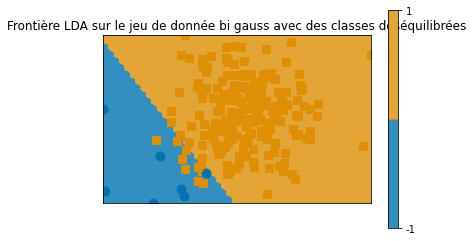

In [45]:
def reshape_for_frontierNew(xx):
    return model_own_lda.predict(xx.reshape(1, -1))

frontiere_new(reshape_for_frontierNew, Xtrain_imbalance, Ytrain_imbalance)
plt.title('Frontière LDA sur le jeu de donnée bi gauss avec des classes déséquilibrées')
plt.show()

Meme si les classes sont déséquilibré, l'algorithme LDA semble avoir trouvé une règle de classification satisfaisante.

#### Question 20 :

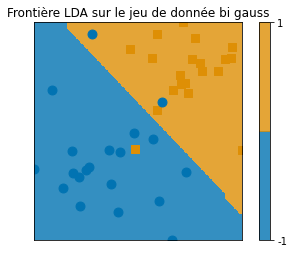

In [46]:
model_own_lda_2 = LDAClassifier().fit(X1, Y1)
def reshape_for_frontierNew(xx):
    return model_own_lda_2.predict(xx.reshape(1, -1))

frontiere_new(reshape_for_frontierNew, X1, Y1)
plt.title('Frontière LDA sur le jeu de donnée bi gauss')
plt.show()

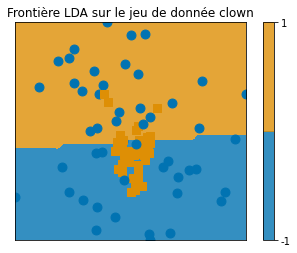

In [47]:
model_own_lda_3 = LDAClassifier().fit(X3, Y3)
def reshape_for_frontierNew(xx):
    return model_own_lda_3.predict(xx.reshape(1, -1))

frontiere_new(reshape_for_frontierNew, X3, Y3)
plt.title('Frontière LDA sur le jeu de donnée clown')
plt.show()

La variance n'est pas la meme entre les deux classes du dataset clown. Les résultats ne sont donc pas satisfaisant. 

Par contre, pour la base de données bi gauss, la règle de classification est satisfaisante, les données sont correctement séparés. 

#### Question 21 :

In [48]:
model_lr = linear_model.LogisticRegression(solver='lbfgs').fit(Xtrain_imbalance, Ytrain_imbalance)
score_lr = model_lr.score(Xtest_imbalance, Ytest_imbalance)
print(score_lr)

0.975


In [49]:
model_sklearn_lda =  LinearDiscriminantAnalysis().fit(Xtrain_imbalance, Ytrain_imbalance)
score_sklearn_lda = model_sklearn_lda.score(Xtest_imbalance, Ytest_imbalance)
print(score_sklearn_lda)

0.9738095238095238


Les résultats sont sensiblement les mêmes pour les deux approches dans l'instance actuelle (bien sur ca risque de changer après ré-éxécution du code, mais ils sont tout de même très proche). Pourtant, il y a 20 fois plus d'individu dans la classe 1 que dans la classe 2.

Je pense qu'il fallait conclure que la LDA est plus robuste que la regression logistique lorsque les classes sont déséquilibrés.

#### Question 22 :

coef_ correspond aux coefficients de chacunes des features dans le modèle de regression logistique

intercept_ correspond au biais introduit. On peut aussi le voir comme l'ordonnée à l'origine de la regression. Il est indispensable si on ne standardise pas les données.

#### Question 23 :

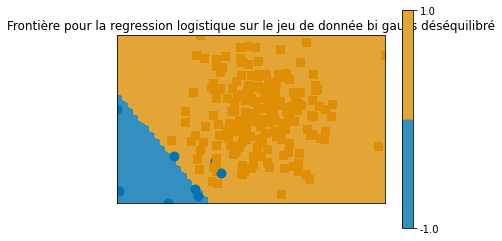

In [50]:
def reshape_for_frontierNew(xx):
    return model_lr.predict(xx.reshape(1, -1))

frontiere_new(reshape_for_frontierNew, Xtrain_imbalance, Ytrain_imbalance)
plt.title('Frontière pour la regression logistique sur le jeu de donnée bi gauss déséquilibré')
plt.show()

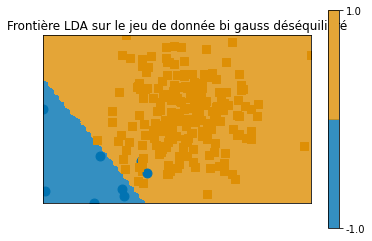

In [51]:
def reshape_for_frontierNew(xx):
    return model_sklearn_lda.predict(xx.reshape(1, -1))

frontiere_new(reshape_for_frontierNew, Xtrain_imbalance, Ytrain_imbalance)
plt.title('Frontière LDA sur le jeu de donnée bi gauss déséquilibré')
plt.show()

On peut voir que la fronière de classification est (légèrement) plus du coté de la classe en sous effectif pour la regression logistique. Ce n'est cepandant pas flagrant.

#### Question 24 :

In [52]:
Xtrain_digits, Xtest_digits, Ytrain_digits, Ytest_digits = train_test_split(digits['data'],
                                                                            digits['target'], test_size=0.5, shuffle=True)

In [53]:
model_digits_lr = linear_model.LogisticRegression(solver='lbfgs').fit(Xtrain_digits, Ytrain_digits)
print("Erreur de prédiction du model de regression logistique sur la BDD digits", model_digits_lr.score(Xtest_digits, Ytest_digits))

Erreur de prédiction du model de regression logistique sur la BDD digits 0.9510567296996663
